## Data Exploration

In [1]:
#Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


# Read data from file   
data = pd.read_csv("Data\deceptive-opinion.csv") 


#We keep only the 3 columns DECEPTIVE, POLARITY and TEXT
data = data.iloc[:,[0,2,4]]

In [2]:
data.head()

,deceptive,polarity,text
0,truthful,positive,We stayed for a one night getaway with family ...
1,truthful,positive,Triple A rate with upgrade to view room was le...
2,truthful,positive,This comes a little late as I'm finally catchi...
3,truthful,positive,The Omni Chicago really delivers on all fronts...
4,truthful,positive,I asked for a high floor away from the elevato...


In [3]:
'''
#We have 1600 rows and 5 different clmns
#We do not care for all of them 
#This corpus contains:

#400 truthful positive reviews from TripAdvisor (described in [1])
#400 deceptive positive reviews from Mechanical Turk (described in [1])
#400 truthful negative reviews from Expedia, Hotels.com, Orbitz, Priceline, TripAdvisor and Yelp (described in [2])
#400 deceptive negative reviews from Mechanical Turk (described in [2])

#Each of the above datasets consist of 20 reviews for each of the 20 most popular Chicago hotels (see [1] for more details). 
#The files are named according to the following conventions:
#Directories prefixed with fold correspond to a single fold from the cross-validation experiments reported in [1] and [2].
#REFERENCE : https://www.kaggle.com/rtatman/deceptive-opinion-spam-corpus
#[1] M. Ott, Y. Choi, C. Cardie, and J.T. Hancock. 2011. Finding Deceptive Opinion Spam by Any Stretch of the Imagination. In Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies.
#[2] M. Ott, C. Cardie, and J.T. Hancock. 2013. Negative Deceptive Opinion Spam. In Proceedings of the 2013 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies.

'''


(1600, 5)

In [3]:
data.shape


(1600, 3)

In [ ]:
'''
We first suffle the data because the dataset is really structured. 
During the data exploration we can see that the dataset is balanced without any missing values.
'''

In [2]:
#We shuffle the data because now there are all divived into blocks
#for intance, all positives are together etc
from sklearn.utils import shuffle
data = shuffle(data, random_state = 0)
data = data.reset_index(drop=True)




In [9]:
data.head()

,deceptive,polarity,text
0,truthful,negative,"I never write these reviews, but felt that it ..."
1,truthful,positive,We stayed at the Palmer House Hilton in early ...
2,deceptive,negative,My experience at the Amalfi Hotel in Chicago w...
3,truthful,negative,This review has two parts. . .I advise reading...
4,truthful,negative,We chose to stay at a small hotel because we d...


## Statistics 

In [10]:
data["deceptive"].value_counts() #Balanced Dataset for deceptive detection

deceptive    800
truthful     800
Name: deceptive, dtype: int64

In [11]:
data["polarity"].value_counts() #Balanced Dataset for polarity detection


positive    800
negative    800
Name: polarity, dtype: int64

In [12]:
#searching for missing values
data.isnull().sum() #No missing values


deceptive    0
polarity     0
text         0
dtype: int64

In [13]:
data.isna().sum() #No NA values

deceptive    0
polarity     0
text         0
dtype: int64

In [4]:
#It is good to read some of the positive and negative reviews so we can have an idea about the reviews
#Take a look how a positive review looks like
#data.iloc[]
print(data.loc[data["polarity"] == "positive"].iloc[0,2])


We stayed at the Palmer House Hilton in early December, we stay there that weekend every December and we think it is the best location in the city for us. We like State Street better than Michigan Avenue and the Palmer House is right there. We stayed in the Towers, in a room with two double beds and 2 baths. The room was not huge, but very comfortable. The towers area was recently refurbished and it shows, the lobby is beautiful with plasma screen TVs on the walls, comfortable chairs and tables and a seperate room for the food/drinks. There is a continental breakfast in the morning, appetizers during cocktail hour and cookies are laid out until the room closes. There is a fridge stocked with soft drinks, water and juice that are yours for the taking. We were very pleased with the upgraded Towers, everyone should check it out! 



In [5]:
#Negative review
print(data.loc[data["polarity"] == "negative"].iloc[0,2])


I never write these reviews, but felt that it was important to state that this hotel should not be the #1 2008 travelers choice. Terrible Service, Lazy Doormen/bellmen/concierge/valet, Lack of Respect, allow dogs to bark all morning after multiple complaints, Phantom charges to room, front dest at checkout and checkin were pompus. The icing on the cake was me watching the doormen stand and watch while a father tried to open a door to push his stroller through with his infant son, and the doorman watched on doing nothing. Me and my girlfriend are young, look young in how we dress, but in all honesty make more money than most...and we were treated like cheap poor kids. I had dinner reservations at Spaiggia and wanted to order a car to pick us up, the concierge exclaimed that, 'You know its not jeans and running shoes right Mr. Blank?' Assuming I was too dumb to realize that a 5 star $200/person restraunt wont allow tennis shoes because I am young? Very Dissapointed. Very nice looking, co

In [14]:
#deceptive review
print(data.loc[data["deceptive"] == "deceptive"].iloc[1,2])


My three night stay at Fairmont Chicago Millennium Park was the perfect way to end a weekend. The hotel has a classy but warm atmosphere with color tones that please the mind and soothe the eyes. The staff was ready to help at any notice and always greeted you with a cheerful smile. The mySpa was the getaway of a life time. My only complaint would be that the bed covers were a bit too stiff as they were new and clean but the softness of the bed whisked me away to a deep slumber in no time. Well worth the money and I know my next stay will be much longer. 



In [13]:
#truthful review
print(data.loc[data["deceptive"] == "truthful"].iloc[7,2])

My stay at the The James was perfect. My room was thoughtfully designed: the lighting, the storage space, the bar area, the eating nook and everything else in the room was purposeful and pretty to look at. The staff was friendly and and genuinely accomadating. The restaurant (Primehouse) echoed the above. Great service and one of the best steaks I've had in a very long time. 



## Visualization 

In [ ]:
'''
As mentioned before the dataset has a very good quality. Therefore a very simple preprocessing is done using mostly SPACY package(https://spacy.io/usage/spacy-101).
During the vectorization step a function build by us is used. The function returns, for each review, the lemma of each word in lower case
WITHOUT stop words and  numbers.

Plotting the most common words for the positives and negatives reviews can give us some idea for the problem.
As we can see from the two histograms, both reviews have a lot of common words.
'''

In [7]:
#We will use Spacy for Preprocessing
########## REFERENCE https://spacy.io/usage/spacy-101 ##############################
import spacy 
from collections import Counter
#from spacy_hunspell import spaCyHunSpell


In [8]:
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner"])

In [9]:
#The data look in a very good quality. There are balanced at first.
#So we will start with a normal pre processing without something fancy
#Our function for preprocessing. We check if it is a stop word, if it is a number and/or punctuation and return the 
def preprocess(text):
    doc = nlp(text)
    #We only return the words that are NOT stop words, numbers. We return the lemma of the word with lower case
    out = [token.lemma_.strip().lower() for token in doc if not token.is_stop and token.lemma_.isalpha()]
    return out


In [14]:
#We could see that there are some spelling mistakes which would be good if we cna exctract
#preprocess(data.loc[data["polarity"] == "positive"].iloc[0,4])
data.head()

,deceptive,polarity,text
0,truthful,negative,"I never write these reviews, but felt that it ..."
1,truthful,positive,We stayed at the Palmer House Hilton in early ...
2,deceptive,negative,My experience at the Amalfi Hotel in Chicago w...
3,truthful,negative,This review has two parts. . .I advise reading...
4,truthful,negative,We chose to stay at a small hotel because we d...


### Polarity visualization

In [15]:
#We could preprocess the data and try to visualize positive and negative words to take an idea of the most "important" words for each class
#So first we have to preprocess the data and after that find the most common words

#We have a list comprehansion in which we send each row to the preprocessor first and after that we pass it through the Counter.
#In that way we can choose the most common words for the positive reviews
#a = df.loc[df["polarity"] == "positive"].iloc[:,1]

preProc_pos = " ".join([" ".join(preprocess(row[2])) for row in data.loc[data["polarity"] == "positive"].itertuples(index=False)])
Most_Pos_words = Counter(preProc_pos.split(" ")).most_common(20)

#We do the same for negative reviews
preProc_neg = " ".join([" ".join(preprocess(row[2])) for row in data.loc[data["polarity"] == "negative"].itertuples(index=False)])
Most_Neg_words = Counter(preProc_neg.split(" ")).most_common(20)



In [16]:
x1 = [i[0] for i in Most_Pos_words]
y1 = [i[1] for i in Most_Pos_words]

x2 = [i[0] for i in Most_Neg_words]
y2 = [i[1] for i in Most_Neg_words]


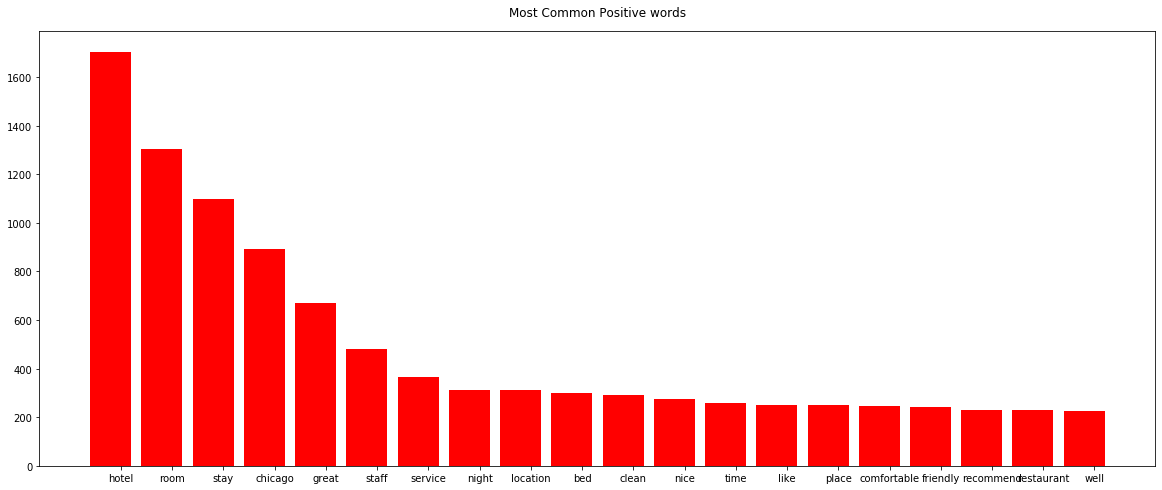

In [17]:
#plot the histogram of the most common positive words 
index = np.arange(len(Most_Neg_words))
fig = plt.figure(figsize = (20,8))
bar_width = 0.2
rects1 = plt.bar(index, y1, color = "red")
plt.xticks(index + bar_width, x1, rotation=0)
plt.title("Most Common Positive words", y=1.02)
plt.show()



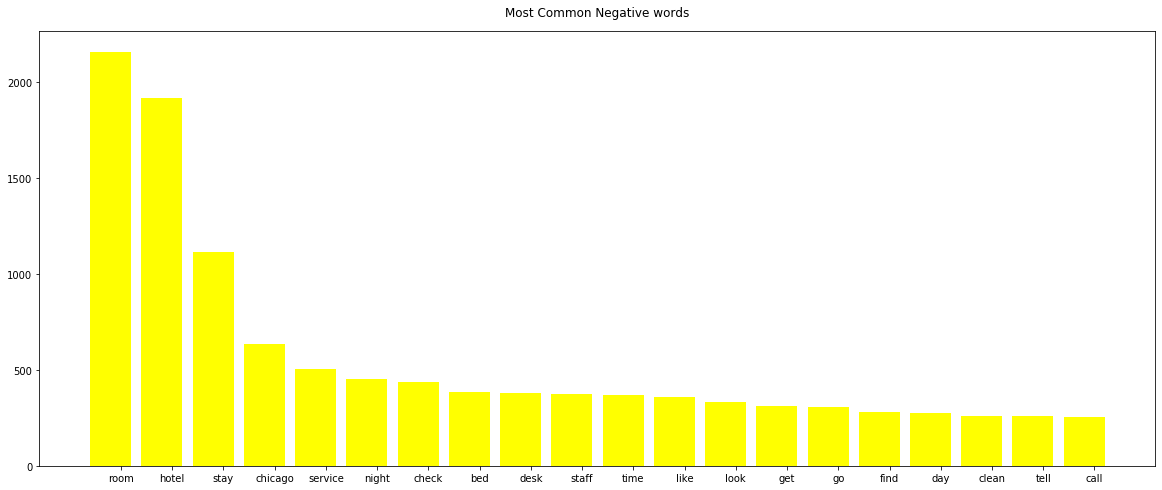

In [18]:
#plot the histogram of the most common negative words
fig = plt.figure(figsize = (20,8))
bar_width = 0.2
rects1 = plt.bar(index, y2, color = "yellow")
plt.xticks(index + bar_width, x2, rotation=0)
plt.title("Most Common Negative words", y=1.02)
plt.show()


In [28]:
#REFERENCE https://towardsdatascience.com/detecting-bad-customer-reviews-with-nlp-d8b36134dc7e
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()


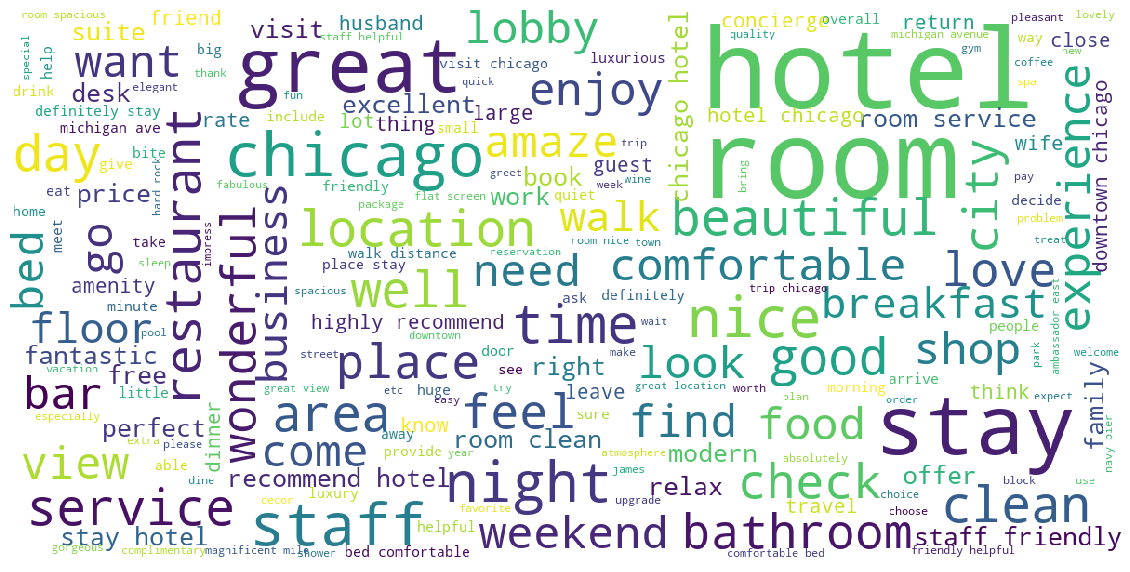

In [29]:
show_wordcloud(preProc_pos) #most common words in positive reviews

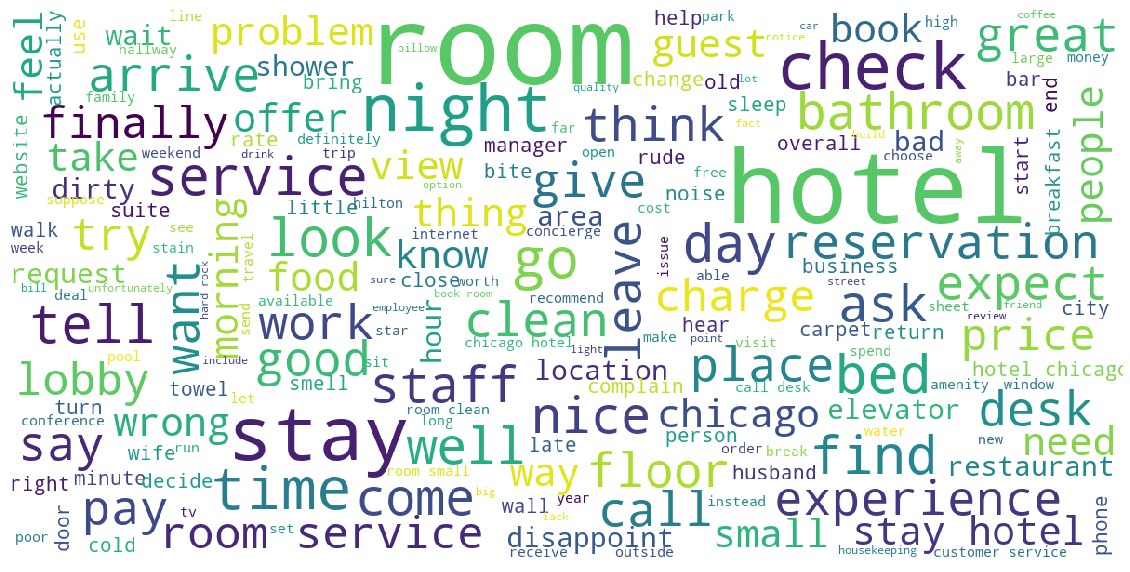

In [21]:
show_wordcloud(preProc_neg) #most common words in negative reviews

### Deceptive visualization

In [22]:
preProc_dec = " ".join([" ".join(preprocess(row[2])) for row in data.loc[data["deceptive"] == "deceptive"].itertuples(index=False)])

#We do the same for negative reviews
preProc_truth = " ".join([" ".join(preprocess(row[2])) for row in data.loc[data["deceptive"] == "truthful"].itertuples(index=False)])



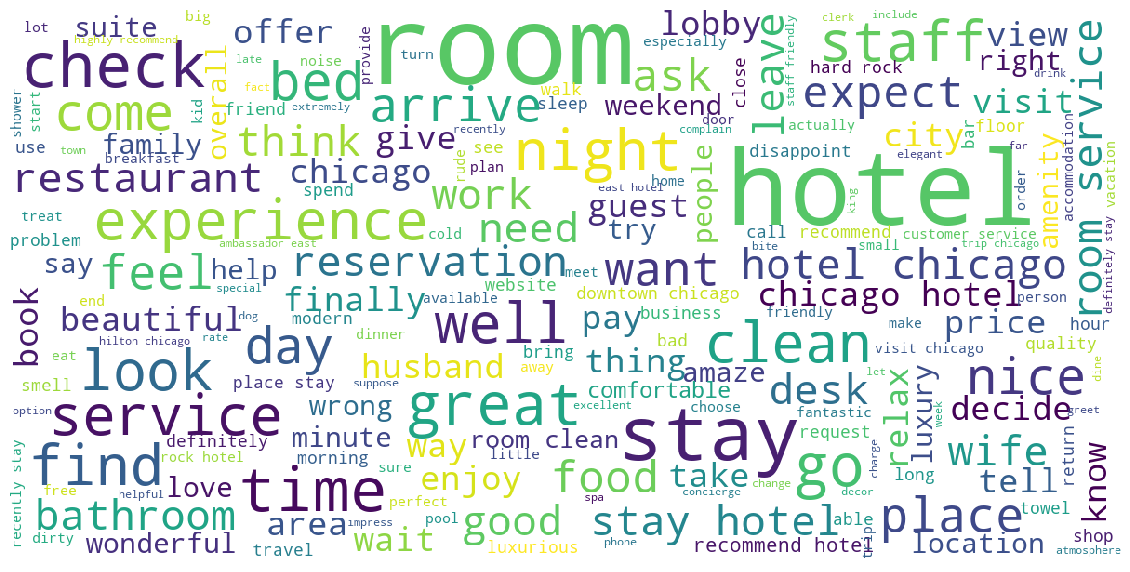

In [30]:
show_wordcloud(preProc_dec) #most common words for deceptive reviews

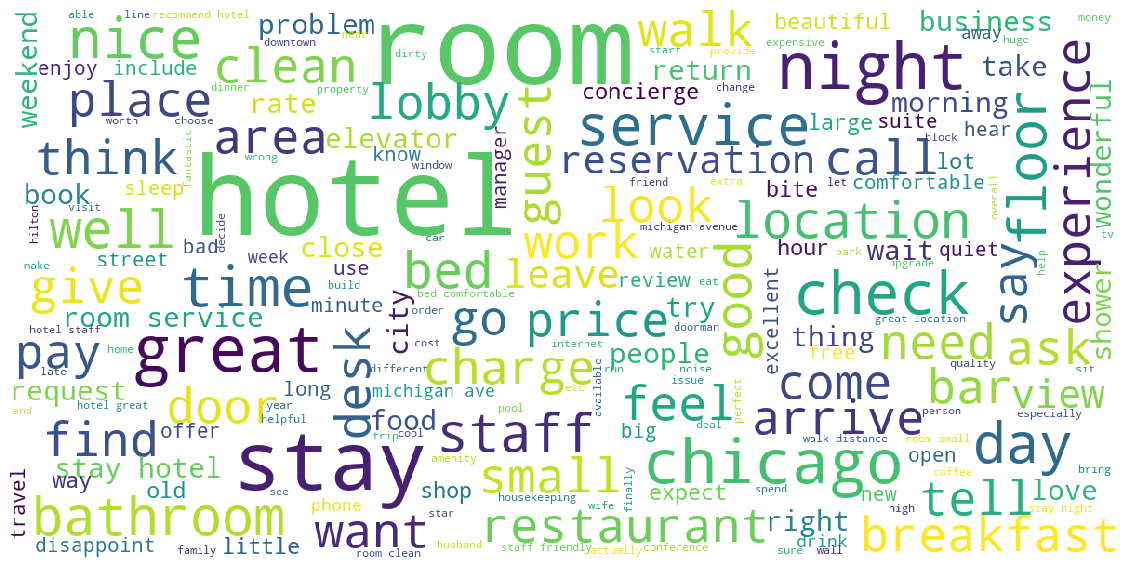

In [31]:
show_wordcloud(preProc_truth) # most common words for truthful reviews

# Positive Negative Classification

In [5]:

#In that step we are going to do the vectorization of the input.
#We are going to send the pre processing function in the vectorizer 
#We are using TF-IDF vectorization here

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


#Spliting the data into train(80%) and test(20%)
X_train, X_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['polarity'], 
                                                    test_size = 0.2,
                                                    random_state=0)

## Baseline

In [11]:
#using the package https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html, we have a baseline
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform", random_state=12345)
dummy_clf.fit(X_train, y_train)

#dummy_clf.predict(X_test)

dummy_clf.score(X_test, y_test)


0.490625

In [ ]:
'''
For the vectorization step we use the TF-IDF vectorizer from the package sklearn(https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html),
which is a weighted version of the countVectorizer.

In this step, we want to train different models and parameters for each model and choose the optimal one(i.e the one which maximizes the accuracy).
In order to achieve that, we train a logistic regression,... . We train all the models with different parameteres using a K -fold cross validation.
After choosing the optimal one, we test it in another dataset to see how good it generalizes.

Given the models we use in the lab, in that project we try 3 different models. One logistic regression, one SVM and the gradient boosting classification.

'''

## SVM - grid search 

In [12]:
countVectorizer = TfidfVectorizer(tokenizer=preprocess)
pipelineSVC = Pipeline([("countVectorizer", countVectorizer), 
               ("classifier", SVC(max_iter=10000, random_state = 0))])
    

In [ ]:
'''
We now use the SVC model. A grid search is being used in order to find the optimal parameters both for the vectorizer and the model itself.

VECTORIZER: for the vectorizer we pass the preprocessing function therefore only the gram range is tested
'''

In [13]:
parameters = {
    "countVectorizer__ngram_range": [(1,1), (1,2),(1,3)],
    "countVectorizer__binary": [True, False],
    "classifier__C": [0.1, 1, 5, 10],
    "classifier__gamma": ["auto","scale"],
    "classifier__kernel": ["rbf","linear","poly"]
}

from sklearn.model_selection import GridSearchCV
gridSVC = GridSearchCV(pipelineSVC, param_grid=parameters, cv=5)


In [14]:
gridSVC.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('countVectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                               

In [15]:
predsSVC = gridSVC.best_estimator_.predict(X_test)
print(classification_report(y_test, predsSVC))

              precision    recall  f1-score   support

    negative       0.97      0.93      0.95       169
    positive       0.92      0.97      0.94       151

    accuracy                           0.95       320
   macro avg       0.95      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320



In [28]:
pd.DataFrame(gridSVC.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__gamma,param_classifier__kernel,param_countVectorizer__binary,param_countVectorizer__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.235044,0.822929,0.690047,0.091130,0.1,auto,rbf,True,"(1, 1)","{'classifier__C': 0.1, 'classifier__gamma': 'a...",0.505837,0.507812,0.507812,0.507812,0.505882,0.507031,0.000957,81
1,3.962583,0.761229,0.834922,0.188828,0.1,auto,rbf,True,"(1, 2)","{'classifier__C': 0.1, 'classifier__gamma': 'a...",0.505837,0.507812,0.507812,0.507812,0.505882,0.507031,0.000957,81
2,9.504420,3.466580,1.267206,0.384491,0.1,auto,rbf,True,"(1, 3)","{'classifier__C': 0.1, 'classifier__gamma': 'a...",0.505837,0.507812,0.507812,0.507812,0.505882,0.507031,0.000957,81
3,3.764675,0.988635,0.729254,0.132564,0.1,auto,rbf,False,"(1, 1)","{'classifier__C': 0.1, 'classifier__gamma': 'a...",0.505837,0.507812,0.507812,0.507812,0.505882,0.507031,0.000957,81
4,4.034701,0.471566,1.018320,0.299683,0.1,auto,rbf,False,"(1, 2)","{'classifier__C': 0.1, 'classifier__gamma': 'a...",0.505837,0.507812,0.507812,0.507812,0.505882,0.507031,0.000957,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,6.221569,1.596802,1.077270,0.102225,10,scale,poly,True,"(1, 2)","{'classifier__C': 10, 'classifier__gamma': 'sc...",0.517510,0.519531,0.542969,0.531250,0.521569,0.526563,0.009462,75
140,6.748734,1.274500,1.175096,0.106941,10,scale,poly,True,"(1, 3)","{'classifier__C': 10, 'classifier__gamma': 'sc...",0.505837,0.507812,0.507812,0.507812,0.505882,0.507031,0.000957,81
141,3.385858,0.186834,0.828715,0.062724,10,scale,poly,False,"(1, 1)","{'classifier__C': 10, 'classifier__gamma': 'sc...",0.929961,0.914062,0.949219,0.933594,0.945098,0.934375,0.012391,56
142,7.906736,3.028297,1.987119,0.946627,10,scale,poly,False,"(1, 2)","{'classifier__C': 10, 'classifier__gamma': 'sc...",0.673152,0.695312,0.683594,0.753906,0.713725,0.703906,0.028397,65


In [16]:
gridSVC.best_params_ #model with optimal parameters after tuning

{'classifier__C': 1,
 'classifier__gamma': 'auto',
 'classifier__kernel': 'linear',
 'countVectorizer__binary': True,
 'countVectorizer__ngram_range': (1, 2)}

In [17]:
#confusion matrix for test data
from sklearn.metrics import confusion_matrix
conf_matrixSVM = confusion_matrix(y_test, predsSVC)
conf_matrixSVM

names = ["negative","positive"]
dfConfMatrixSVM = pd.DataFrame(conf_matrixSVM, index=names, columns=names)
dfConfMatrixSVM

,negative,positive
negative,157,12
positive,5,146


## Generalization of the optimal SVM 

In [ ]:
'''
Now we are going to use an external dataset in order to see how our model generalizes 
The dataset is from an other source data https://www.kaggle.com/datafiniti/hotel-reviews#Datafiniti_Hotel_Reviews_Jun19.csv
'''

In [18]:

#import the external dataset  
validation=pd.read_csv('Data\Datafiniti_Hotel_Reviews.csv')
df=validation[['reviews.text','reviews.rating']] #keep only the two columns we are interesting in 
df=df.dropna() #drop all missing values

In [19]:
df.head()

,reviews.text,reviews.rating
0,Our experience at Rancho Valencia was absolute...,5.0
1,Amazing place. Everyone was extremely warm and...,5.0
2,We booked a 3 night stay at Rancho Valencia to...,5.0
3,Currently in bed writing this for the past hr ...,2.0
4,I live in Md and the Aloft is my Home away fro...,5.0


In [20]:
len(df)

9999

In [21]:
#This dataset has no polarity column. It is just ranking
#For that reason we make a transformation
#all reviews more than 2.5 are positive and the rest are negatives
df['polarity'] = np.where(df['reviews.rating'] > 2.5, "positive", 'negative')
df.tail()

,reviews.text,reviews.rating,polarity
9995,It is hard for me to review an oceanfront hote...,3.0,positive
9996,"I live close by, and needed to stay somewhere ...",4.0,positive
9997,Rolled in 11:30 laid out heads down woke up to...,4.0,positive
9998,Absolutely terrible..I was told I was being gi...,1.0,negative
9999,"Filthy, outdated, noisy neighbours, but this w...",1.0,negative


In [22]:
len(df[df["polarity"] == "positive"]),len(df[df["polarity"] == "negative"]) #unbalanced data set

(8804, 1195)

### Balanced dataset- NOT IN THE REPORT

In [34]:
#We alo tried with balanced dataset.
#The external dataset is unbalanced. For that reason we use undersampling
#We keep all the 1195 negative observations and we sample the same amount for the 8804 sample of positive 
lowestCount = len(df[df["polarity"] == "negative"])
labels = df["polarity"].unique()
genTest = pd.DataFrame()
for l in labels:
    genTest = genTest.append(df[df["polarity"]==l].sample(lowestCount, replace=False, random_state=12345))

In [105]:
len(genTest)

2390

In [35]:
#make predictions
GeneralPred = gridSVC.best_estimator_.predict(genTest["reviews.text"])
print(classification_report(genTest["polarity"], GeneralPred))

              precision    recall  f1-score   support

    negative       0.77      0.94      0.85      1195
    positive       0.92      0.72      0.81      1195

    accuracy                           0.83      2390
   macro avg       0.84      0.83      0.83      2390
weighted avg       0.84      0.83      0.83      2390



In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(genTest["polarity"], GeneralPred)
conf_matrix

names = ["negative","positive"]
dfConfMatrix = pd.DataFrame(conf_matrix, index=names, columns=names)
dfConfMatrix

,negative,positive
negative,1120,75
positive,335,860


### Unbalanced dataset 

In [ ]:
'''
We decided to use the unbalanced data. It is more common for real world applications.
'''

In [39]:
#make predictions
df_sample = df.sample(1000,random_state=12345)
Pred_unbalanced = gridSVC.best_estimator_.predict(df_sample["reviews.text"])
print(classification_report(df_sample["polarity"], Pred_unbalanced))

              precision    recall  f1-score   support

    negative       0.31      0.97      0.46       117
    positive       0.99      0.71      0.83       883

    accuracy                           0.74      1000
   macro avg       0.65      0.84      0.65      1000
weighted avg       0.91      0.74      0.78      1000



In [40]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(df_sample["polarity"], Pred_unbalanced)

names = ["negative","positive"]
dfConfMatrix = pd.DataFrame(conf_matrix, index=names, columns=names)
dfConfMatrix

,negative,positive
negative,113,4
positive,257,626


In [40]:
''' ROC curve REFERENCE https://towardsdatascience.com/detecting-bad-customer-reviews-with-nlp-d8b36134dc7e

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (10, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Positive reviews classification')
plt.legend(loc="lower right")
plt.show()

# PR curve

from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature

average_precision = average_precision_score(y_true, y_pred)

precision, recall, _ = precision_recall_curve(y_true, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (10, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

'''

# Deceptive Opinion Spam Classification

In [3]:
#split the data 80% training
#In that task we want all the three columns so we split again
from sklearn.model_selection import train_test_split
X_trainSpam, X_testSpam, y_trainSpam, y_testSpam = train_test_split(data['text'], 
                                                    data[['deceptive',"polarity"]], 
                                                    test_size = 0.2,
                                                    random_state=0)


In [10]:
#pipelines for the three models we are going to use.
countVectorizer = TfidfVectorizer(tokenizer=preprocess)
pipelines = [
    ("GradientBoostingClassifier", 
     Pipeline([("countVectorizer", countVectorizer), 
               ("classifier", GradientBoostingClassifier(random_state = 0))])),
    ("linearSVC", 
     Pipeline([("countVectorizer", countVectorizer), 
               ("classifier", LinearSVC(max_iter=10000))])),
    
    
    ("logisticRegression", 
     Pipeline([("countVectorizer", countVectorizer), 
               ("classifier", LogisticRegression(random_state=0,
                                                 solver="lbfgs",
                                                 max_iter=350))]))    
]

## Model Selection

In [ ]:
'''
We did the model selection on the training data using the default parameters. 
It would make more sense to also tune the parameters and after that do the model selection. 
But when i realized that i have already finish the report.
'''

In [109]:

# 5-fold Cross validation in order to train the model and store the accuracies
CV = 5
cv_dfSpam = pd.DataFrame(index=range(CV * len(pipelines)))
entries = []

for (model_name, pipeline) in pipelines:
    print(model_name)
    accuracies = cross_val_score(pipeline, 
                                 X_trainSpam, 
                                 y_trainSpam["deceptive"], 
                                 scoring="accuracy", cv=CV, 
                                 verbose=2)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    cv_dfSpam = pd.DataFrame(entries, columns=["model_name", "fold_idx", "accuracy"])


GradientBoostingClassifier


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   4.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   4.8s
[CV]  ................................................................
[CV] ................................................. , total=   5.0s
[CV]  ................................................................
[CV] ................................................. , total=   4.6s
[CV]  ................................................................
[CV] ................................................. , total=   3.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.9s finished


linearSVC


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   1.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.6s
[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.6s finished


logisticRegression


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   1.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   1.6s
[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.7s finished


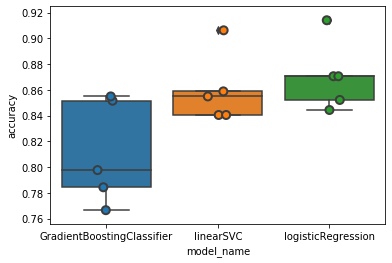

In [110]:
#plot for the model selection
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_dfSpam)
sns.stripplot(x='model_name', y='accuracy', data=cv_dfSpam, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

## Train the optimal model(Logistic)

In [11]:
#choose the optimal model: In that case Logistic regression
pipelineLogistic = pipelines[2][1]

parameters = {
    "countVectorizer__ngram_range": [(1,1), (1,2),(1,3)],
    "countVectorizer__binary": [True, False],
    "classifier__C": [0.1, 1, 10,100]
}

#Grid search with 5-fold CV for tuning the parameters
from sklearn.model_selection import GridSearchCV
gridBestSpam = GridSearchCV(pipelineLogistic, param_grid=parameters, cv=5)
gridBestSpam.fit(X_trainSpam, y_trainSpam["deceptive"])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('countVectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                               

In [12]:
gridBestSpam.best_params_ #paramteres of the best model

{'classifier__C': 100,
 'countVectorizer__binary': True,
 'countVectorizer__ngram_range': (1, 2)}

In [113]:
pd.DataFrame(gridBestSpam.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_countVectorizer__binary,param_countVectorizer__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.641481,0.054234,0.414651,0.019625,0.1,True,"(1, 1)","{'classifier__C': 0.1, 'countVectorizer__binar...",0.844358,0.828794,0.886719,0.870588,0.854902,0.857031,0.020153,19
1,2.056063,0.254802,0.407895,0.064292,0.1,True,"(1, 2)","{'classifier__C': 0.1, 'countVectorizer__binar...",0.797665,0.801556,0.832031,0.815686,0.850980,0.819531,0.019802,22
2,2.189802,0.030186,0.376423,0.037928,0.1,True,"(1, 3)","{'classifier__C': 0.1, 'countVectorizer__binar...",0.762646,0.762646,0.781250,0.776471,0.803922,0.777344,0.015188,24
3,1.167964,0.013160,0.301942,0.009036,0.1,False,"(1, 1)","{'classifier__C': 0.1, 'countVectorizer__binar...",0.817121,0.828794,0.886719,0.858824,0.870588,0.852344,0.025913,20
4,1.597177,0.034986,0.337990,0.012020,0.1,False,"(1, 2)","{'classifier__C': 0.1, 'countVectorizer__binar...",0.832685,0.782101,0.871094,0.847059,0.815686,0.829688,0.029976,21
5,2.240716,0.099506,0.359259,0.006803,0.1,False,"(1, 3)","{'classifier__C': 0.1, 'countVectorizer__binar...",0.785992,0.758755,0.824219,0.792157,0.800000,0.792188,0.021201,23
6,1.198729,0.022318,0.310573,0.012750,1,True,"(1, 1)","{'classifier__C': 1, 'countVectorizer__binary'...",0.859922,0.840467,0.902344,0.882353,0.878431,0.872656,0.021030,10
7,1.743988,0.070886,0.341735,0.011862,1,True,"(1, 2)","{'classifier__C': 1, 'countVectorizer__binary'...",0.859922,0.844358,0.914062,0.886275,0.878431,0.876563,0.023761,6
8,2.529531,0.057164,0.362541,0.011350,1,True,"(1, 3)","{'classifier__C': 1, 'countVectorizer__binary'...",0.856031,0.836576,0.910156,0.882353,0.878431,0.872656,0.024970,10
9,1.224550,0.021880,0.305926,0.009174,1,False,"(1, 1)","{'classifier__C': 1, 'countVectorizer__binary'...",0.844358,0.852140,0.914062,0.870588,0.870588,0.870313,0.024174,12


## Evaluation

In [13]:
# indexing: We split the data into positive and negative reviews
#We will test the model in two different datasets. One with only positive reviews and one with only negative
Xtest_pos = X_testSpam[y_testSpam.loc[y_testSpam["polarity"] == "positive"].index.tolist()]
Xtest_neg = X_testSpam[y_testSpam.loc[y_testSpam["polarity"] == "negative"].index.tolist()]
ytest_pos = y_testSpam.loc[y_testSpam["polarity"] == "positive"]["deceptive"]
ytest_neg = y_testSpam.loc[y_testSpam["polarity"] == "negative"]["deceptive"]

In [14]:

# We test the model in two different test dataset. One only of positive reviews and one only for negatives
#PREDICT THE DECEPTIVE column ONLY for POSITIVE reviews
preds_LRpos = gridBestSpam.best_estimator_.predict(Xtest_pos)
print(classification_report(ytest_pos, preds_LRpos))

              precision    recall  f1-score   support

   deceptive       0.80      0.97      0.88        65
    truthful       0.97      0.81      0.89        86

    accuracy                           0.88       151
   macro avg       0.88      0.89      0.88       151
weighted avg       0.90      0.88      0.88       151



In [15]:
#PREDICT THE DECEPTIVE column ONLY for NEGATIVE reviews
preds_LRneg = gridBestSpam.best_estimator_.predict(Xtest_neg)
print(classification_report(ytest_neg, preds_LRneg))

              precision    recall  f1-score   support

   deceptive       0.83      0.95      0.89        87
    truthful       0.94      0.79      0.86        82

    accuracy                           0.88       169
   macro avg       0.89      0.87      0.87       169
weighted avg       0.88      0.88      0.87       169



In [20]:
#confusion matrix NOT ONE THE REPORT
#Confusion matrix for positives
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(ytest_pos, preds_LRpos)

names = ["deceptive","truthful"]
dfConfMatrix = pd.DataFrame(conf_matrix, index=names, columns=names)
dfConfMatrix

,deceptive,truthful
deceptive,63,2
truthful,16,70


In [21]:
#conf matrix for negatives  NOT ONE THE REPORT
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(ytest_neg, preds_LRneg)

names = ["deceptive","truthful"]
dfConfMatrix = pd.DataFrame(conf_matrix, index=names, columns=names)
dfConfMatrix

,deceptive,truthful
deceptive,83,4
truthful,17,65


## Gboosting - NOT TO THE REPORT 

In [ ]:
'''
We have also train and tune the huperparameteres for GB but the results were worst than Logistic so we continue with Logistic
'''

In [168]:
#we also try the GBoosting using grid search but we have worse results than logistic
#NOT IN THE REPORT
pipelineGB = pipelines[0][1]


parameters = {
    "countVectorizer__ngram_range": [(1,1), (1,2),(1,3)],
    "classifier__learning_rate": [0.1,0.3, 0.5,1,10],
    "classifier__n_estimators": [100,200,500],
    "classifier__max_depth": [2,3,5]
}


gridBestSpamGb = GridSearchCV(pipelineGB, param_grid=parameters, cv=5)
gridBestSpamGb.fit(X_trainSpam, y_trainSpam)


#sorted(pipelineGB.get_params().keys())

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('countVectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                               

### Evaluation

In [169]:
gridBestSpamGb.best_params_ #optimal for GBoosting

{'classifier__learning_rate': 0.3,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 500,
 'countVectorizer__ngram_range': (1, 2)}

In [170]:
pd.DataFrame(gridBestSpamGb.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_countVectorizer__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.292174,0.385936,0.593028,0.100017,0.1,2,100,"(1, 1)","{'classifier__learning_rate': 0.1, 'classifier...",0.789883,0.770428,0.832031,0.768627,0.823529,0.796875,0.026419,83
1,8.226356,0.319964,0.485673,0.076948,0.1,2,100,"(1, 2)","{'classifier__learning_rate': 0.1, 'classifier...",0.789883,0.754864,0.843750,0.772549,0.819608,0.796094,0.031998,85
2,19.224586,3.493221,0.440749,0.029151,0.1,2,100,"(1, 3)","{'classifier__learning_rate': 0.1, 'classifier...",0.770428,0.750973,0.816406,0.756863,0.807843,0.780469,0.026712,102
3,4.486535,0.192430,0.382524,0.043340,0.1,2,200,"(1, 1)","{'classifier__learning_rate': 0.1, 'classifier...",0.801556,0.778210,0.855469,0.784314,0.847059,0.813281,0.032015,35
4,12.598429,0.596268,0.404593,0.011692,0.1,2,200,"(1, 2)","{'classifier__learning_rate': 0.1, 'classifier...",0.805447,0.782101,0.828125,0.807843,0.835294,0.811719,0.018750,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,32.207866,1.548017,0.387580,0.031929,10,5,200,"(1, 2)","{'classifier__learning_rate': 10, 'classifier_...",0.268482,0.482490,0.484375,0.439216,0.349020,0.404687,0.084054,115
131,76.738856,3.566696,0.406278,0.040747,10,5,200,"(1, 3)","{'classifier__learning_rate': 10, 'classifier_...",0.284047,0.342412,0.289062,0.494118,0.317647,0.345313,0.077149,134
132,22.300589,0.693487,0.375029,0.029647,10,5,500,"(1, 1)","{'classifier__learning_rate': 10, 'classifier_...",0.424125,0.412451,0.375000,0.345098,0.294118,0.370312,0.047176,128
133,77.579396,3.594911,0.393779,0.025002,10,5,500,"(1, 2)","{'classifier__learning_rate': 10, 'classifier_...",0.268482,0.400778,0.484375,0.439216,0.341176,0.386719,0.075605,123


In [172]:
preds_bestClassifierSpamGb = gridBestSpamGb.best_estimator_.predict(X_testSpam)
print(classification_report(y_testSpam, preds_bestClassifierSpamGb))

              precision    recall  f1-score   support

   deceptive       0.79      0.88      0.83       152
    truthful       0.88      0.79      0.83       168

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.84      0.83      0.83       320



In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(testY, preds)

In [ ]:
dfConfMatrix = pd.DataFrame(conf_matrix, index=parties, columns=parties)
dfConfMatrix